# The Performance of Teams in Allsvenskan – first half of season 2023

## 1. Region and Domain

Sweden, Sports and Athletics

## 2. Research Question

How have clubs in Allsvenskan (League level: First Tier, Sweden) have performed during the first half of Allsvenskan compared to exoected performance according to market value of club?

## 3. Links of datasets

https://www.allsvenskan.se/

https://www.transfermarkt.com/allsvenskan/marktwerteverein/wettbewerb/SE1/plus/?stichtag=2023-06-15


## 4. Method

The project was done on Jupyter Notebook with:
<li> Pandas (Data Analysis Library of Python) - https://pandas.pydata.org/ </li>
<li> NumPy (Fundamental package for scientific computing) - https://numpy.org/ </li>
<li> Matplotlib (Library for visualization with Python) - https://matplotlib.org/ </li>

## 5. Images (and code)

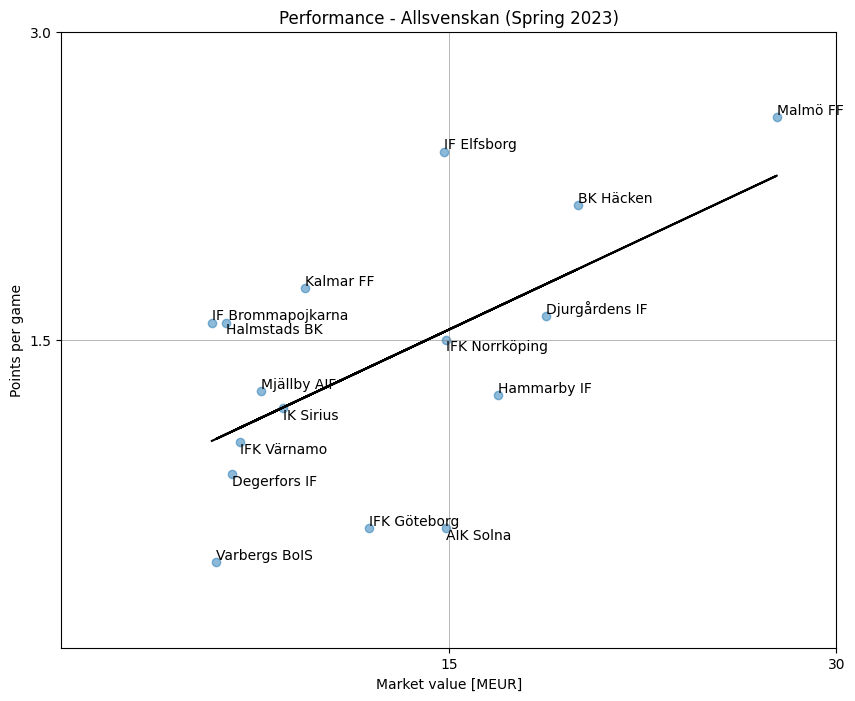

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Reading data
url_mv = 'https://github.com/gustmic/Project-Football/blob/main/Allsvenskan%20-%20team%20value%20in%20MEUR%20(per%202023-06-15).xlsx?raw=True'
market_value = pd.read_excel(url_mv)
url_table = 'https://github.com/gustmic/Project-Football/blob/main/Allsvenskan%20-%20Spring%202023.xlsx?raw=True'
table = pd.read_excel(url_table)


# -------------------------------------------------

# Creating a new working df and setting Teams to index
table = table.rename(columns={'Team':'Club'})
df = table.set_index('Club')

# Setting Teams to index for market_value
market_value = market_value.set_index('Club')

# Creating a new column, Pts/G, to better reflect uneven number of games played
df['Pts/G'] = df['Pts']/df['G']

# Cleaning up market_value
market_value['Value Jun 15, 2023'] = market_value['Value Jun 15, 2023'].str.replace('m', '')
market_value['Value Jun 15, 2023'] = market_value['Value Jun 15, 2023'].str.replace('€', '')

# Cleaning up team names of df
df = df.rename(index={
    'Elfsborg':'IF Elfsborg',
    'Häcken':'BK Häcken',
    'Djurgården':'Djurgårdens IF',
    'Brommapojkarna\xa0':'IF Brommapojkarna',
    'Halmstads BK\xa0':'Halmstads BK',
    'Norrköping':'IFK Norrköping',
    'Hammarby':'Hammarby IF',
    'Sirius':'IK Sirius',
    'Värnamo':'IFK Värnamo',
    'Degerfors':'Degerfors IF',
    'AIK':'AIK Solna'
})

# Adding market value of teams for the spring of 2023 to the df
df['Market Value [MEUR]'] = market_value['Value Jun 15, 2023']
df['Market Value [MEUR]'] = df['Market Value [MEUR]'].astype(float)

# Calculating efficincy of teams (Pts/G taken per Market value)
df['Efficiency'] = df['Pts/G']/df['Market Value [MEUR]']

# Sort by performance
df = df.sort_values(by=['Efficiency'], ascending=False)


# -------------------------------------------------

# create scatterplot
fig, ax = plt.subplots(figsize=(10,8))


#if df.index in ['IF Elfsborg', 'Kalmar FF', 'IF Brommapojkarna'] 
#plt.scatter(df['Market Value [MEUR]'], df['Pts/G'], color='green', alpha=0.5)
#plt.scatter(df['Market Value [MEUR]'], df['Pts/G'], color='red', alpha=0.5)
plt.scatter(df['Market Value [MEUR]'], df['Pts/G'], alpha=0.5)


# create regression line
k, m = np.polyfit(df['Market Value [MEUR]'], df['Pts/G'], 1)
plt.plot(df['Market Value [MEUR]'], k*df['Market Value [MEUR]']+m, color='black')

    
# Setting x-lim and y-lim
ax.set_xlim(0, 30)
ax.set_ylim(0, 3)

# Set title, axis labels
ax.set_title('Performance - Allsvenskan (Spring 2023)')
ax.set_xlabel('Market value [MEUR]')
ax.set_ylabel('Points per game')
ax.set_xticks([15, 30])
ax.set_yticks([1.5, 3.0])

ax.grid(color='grey', linestyle='-', linewidth=0.4)


# Displaying and adjusting labels
for i, txt in enumerate(df.index):
    if txt in ['AIK Solna', 'Halmstads BK', 'IK Sirius', 'IFK Värnamo', 'Degerfors IF', 'IFK Norrköping']:
        ax.annotate(txt, (df['Market Value [MEUR]'][i], df['Pts/G'][i]), arrowprops=dict(facecolor='black'), horizontalalignment='left', verticalalignment='top')
    else:
        ax.annotate(txt, (df['Market Value [MEUR]'][i], df['Pts/G'][i]), arrowprops=dict(facecolor='black'), horizontalalignment='left', verticalalignment='bottom')


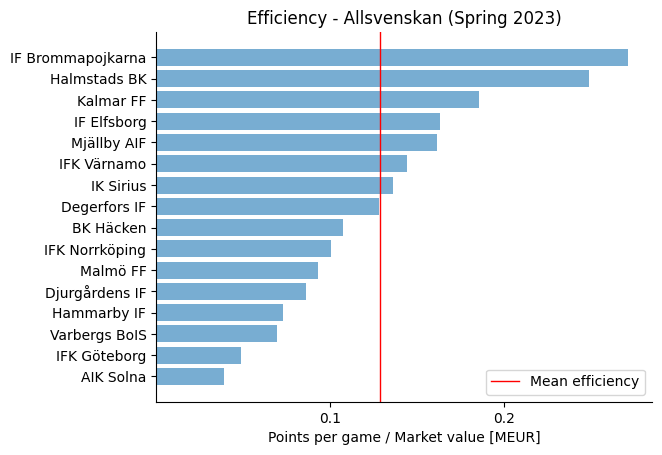

In [5]:
# Creating horizontal bar chart
plt.barh(df.index, df['Efficiency'], alpha=0.6)
ax=plt.gca()
ax.invert_yaxis()

average = np.mean(df['Efficiency'])
# Creating 'Average level'
plt.axvline(x=average, linewidth=1, color='red', label='Mean efficiency')
plt.legend()


# remove spines
for edge in ['right', 'top']:
    ax.spines[edge].set_visible(False)

# Set title, axis labels
ax.set_title('Efficiency - Allsvenskan (Spring 2023)')
ax.set_xlabel('Points per game / Market value [MEUR]')
ax.set_xticks([0.1, 0.2]);

## 6. Discussion

The visualizations concerns answering the question of relative performance of clubs in Allsvenskan (first tier Swedish football league). Looking at the table per 2023-06-15 and comparing that to the expected table at year end by pundits, betting companies and experts will give a non-data driven conclusion.

In Sports Management, there is known strong correlation between the market valuation of a club and its performance. I wanted to see if it was possible to use data to analyze and come to conclusions regarding performance of individual teams. From one dataset (table), I examined the results as points per game since some teams have played more games than others per 2023-06-15. From the other table, I was able to get data on valuation from Transfermarkt per 2023-06-15.

In figure 1, the graph shows the market cap of the clubs vs points per game played. I also created a regression line to make it easier to see what club was over and under-performing. Here it looks like the club IF Elfsborg has done best as it is furthest away from the regression line and AIK Solna has had the worst performance. The image shows that IF Elfsborg has over performed relative to the number of points per game they were expected to achieve. So, this picture shows actual performance compared to expected performance (relative how teams have performed this first half of a season. As a team you want to be above the regression line and in the 2nd quadrant preferably and avoid the 4th quadrant. IF Elfsborg and IF Brommapojkarna are the best performers compared to expected result. They have overachieved. AIK Solna are the worst performer compared to the expected points per game.

In figure 2, the horizontal bar graph shows each team's efficiency in using available means to generate performance. In the graph, there is a mean of all efficiencies plotted, for comparison. It is clear that two teams are extremely efficient in using their market value to create performance, IF Brommapojkarna and Halmstads BK. Both clubs are small and are still performing really well in the table against financially stronger teams.

Teams such as Malmö FF who have had a fantastic season so far with the performance of 10-1-1 (Wins-Draws-Loss) still is not as efficient as the smaller clubs. Why is that? And how come Malmö FF that looked to have a strong performance in figure 1 show weak efficiency in figure 2?

This has to do with the "law of diminishing returns". Large clubs with a high market cap are expected (fig 1) to perform strong, i.e., higher market cap gives you more points per game. Malmö have overachieved regarding this by bringing in more points than was expected regarding market cap. But even though it uses a lot of money to achieve this, it takes a lot of money to do this. With a higher market valuation, a club is only able to gain that many points.

In conclusion, there are two interesting measurements on display here, performance vs expected performance and efficiency. AIK Solna has had a difficult season so far (fig 1 and 2), while IF Brommapojkarna and Halmstads BK are positive performers in terms of performance and efficiency. Further, analyzing data in this way is a good way to estimate a team’s performance.